# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

### Objective:

#### About the dataset:
Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

The objective associated with this dataset is to train a model that can classify patients who underwent surgery for breast cancer into class labels- survived and not survived.

Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# after printing the columns with df.columns, I found that the feature names were not given in the dataset
# so I set the column names for unambiguity.
col_names = ['Age', 'Year of Selection', 'Axilliary nodes detected', 'Survival Status']
df = pd.read_csv('dataset/haberman.csv', names = col_names) # names parameter sets the names of the columns/features

In [3]:
df.shape

(306, 4)

In [4]:
df.head()

,Age,Year of Selection,Axilliary nodes detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.tail()

,Age,Year of Selection,Axilliary nodes detected,Survival Status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [6]:
df.columns

Index(['Age', 'Year of Selection', 'Axilliary nodes detected',
       'Survival Status'],
      dtype='object')

#### As mentioned during the lecture, imbalanced datasets require slightly differnet data analysis as compared to balanced datasets. So, it is important to check what kind of dataset we are working with:

In [7]:
df['Survival Status'].value_counts()

1    225
2     81
Name: Survival Status, dtype: int64

#### The above dataset is fairly imbalanced- number class 1 examples/data_points (225) is much more than the number of class-2 examples, will have to look out for Analysis techniques that might not make sense for such datasets

# 2-D Scatter Plot

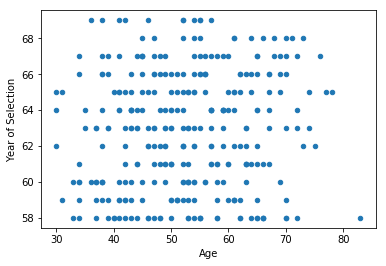

In [8]:
df.plot(kind = 'scatter', x = 'Age', y = 'Year of Selection')
plt.show()

### Observation

Years of Selection varies from 1958 to 1967
Age varies from 30 to 85

The above plot does not serve anything other than some scattered blue lines and range of values. The idea of deriving ideas from this plot does not make any sense since a lot of better information can be derived from sns plots along with the above information as well.
Since plotting a scatter plot for any pair of features woud not be as productive for this case, I will switch to
using Seaborn plotting API for plotting all possible pairs.

#### Using Seaborn to plot the data points so that each datapoints belonging to different classses as coloured differently, and datapoints belonging to the same class are colored in the same color

#### Seaborn Scatter plot-1. Age and Years of Selection: Age on x-axis and Years of Selection on y-axis

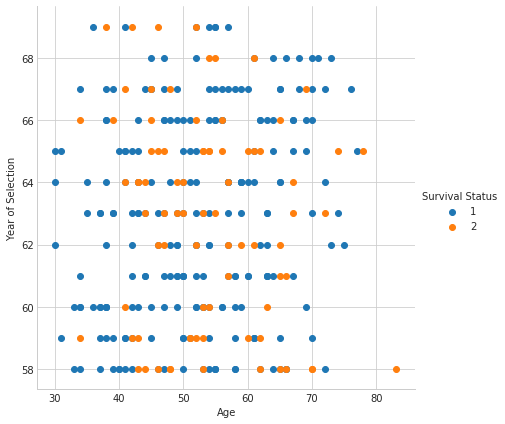

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', size = 6)\
    .map(plt.scatter, 'Age', 'Year of Selection')\
    .add_legend()
plt.show()

### Observation
Separating any of the classes does not look as simple. No linear line, in fact, even a curve seems to be incapable of making out a discerning decision boundary that can seperate the two classes.
Few other ob

### Conclusion
Age and Years of Selection are insufficient to take any kind of classification decision for the dataset

#### Seaborn Scatter plot-2. Age and Axilliary nodes detected: Age on x-axis and Axilliary nodes detected on y-axis

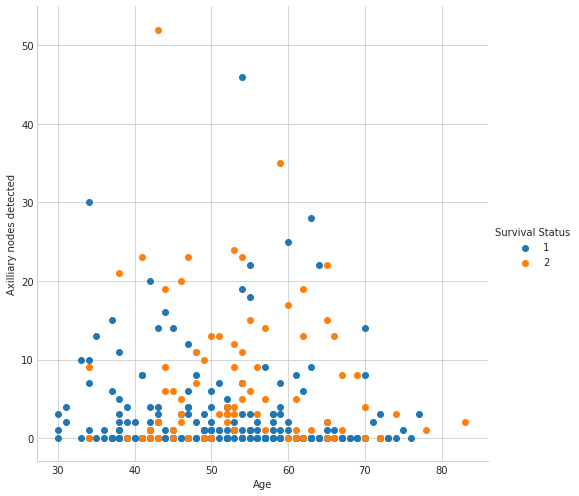

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', size = 7)\
    .map(plt.scatter, 'Age', 'Axilliary nodes detected')\
    .add_legend()
plt.show()

In [11]:
df['Axilliary nodes detected'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Axilliary nodes detected, dtype: int64

### Observation and Conclusion

Since, most of the points on the above plot have value for 'Axilliary nodes detected' as 0s and 1s, most of the datapoints have value of 'Axilliary nodes detected' as 0 and 1 in the df(0 has more frequency of occurrence than 1), verified by printing by actual value counts. Also, from the plot we can say that most of the axilliary nodes detected were less than 10 in number, this count decreases even more after 20. After age 70, the number of axilliary nodes never crosses 5.

From the plot it is clear that we cannot draw any line or a curve that can discern the two classes easily.

#### Seaborn Scatter plot-3. Year of Selection and Axilliary nodes detected: Year of Selection on x-axis and Axilliary nodes detected on y-axis

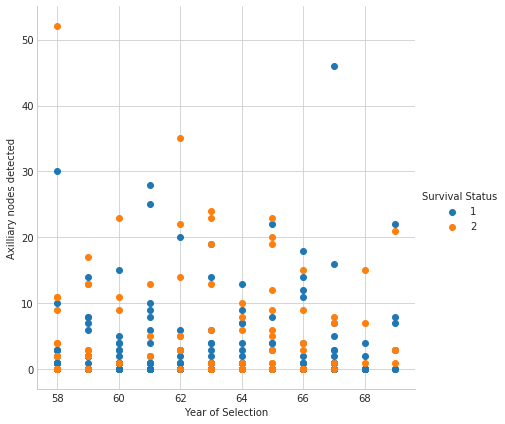

In [12]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Survival Status', size = 6)\
    .map(plt.scatter, 'Year of Selection', 'Axilliary nodes detected')\
    .add_legend()
plt.show()

### Observation

Apart of range of values for different age groups, not much information can be gained.

No discerining decision boundary seems to be possible that can be drawn to distinguish the two classes.

# Pair plots


#### What we achieved using individual scatter plots can be achieved using pair plots. Instead of scatter plots, in order to do analysis taking two independent variables at a time, pair plots could be a better option to go with if there are more than two independent variables (want your feedback on this) .

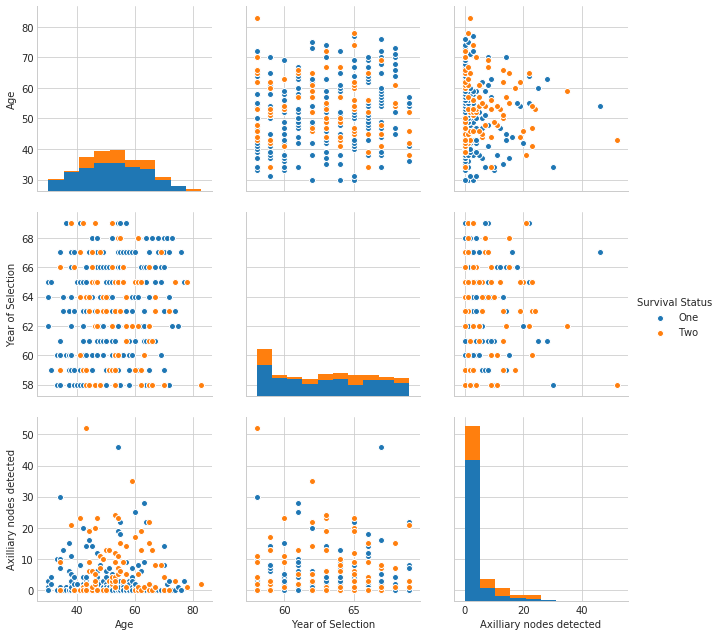

In [13]:
# Since the class label is also numerical, pairplot() plots pairplots corresponding to 'Survival Status' as well.
# Therefore, we need to make our program avoid from doing this. We either can change the labels in Survival Status
# to string, or we can simply not consider the this column for plotting. The latter is difficult to be done as
# we need to pass the dataframe that we want to plot to the sns.pairplot() method. If we choose to pass the df w/o
# Survival Status, then hue = 'Survival Status' would raise an error since this column will not be found. Hence,
# we need to go with doing the former.

# Converting values of Survival Status into string type

## doing this does not work,Py seems to be converting string 1s and 2s to numerical 1s and 2s automatically
# df['Survival Status'] = df['Survival Status'].apply(lambda x: '1' if x == 1 else '2')

df['Survival Status'] = df['Survival Status'].apply(lambda x: 'One' if x == 1 else 'Two')

plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Survival Status', size = 3)
plt.show()

### Observation and conclusions:
Obtained all the 3 scatter plots that we initally had plotted one-by-one earlier individually.

Finally,

No two features seem to be able to discern between the two classes.

# Histogram, PDF and CDF
#### 1D plotting (ie, plotting with respect to one independent variable)

#### Histograms
To check how a given attribute separates the classes 

/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


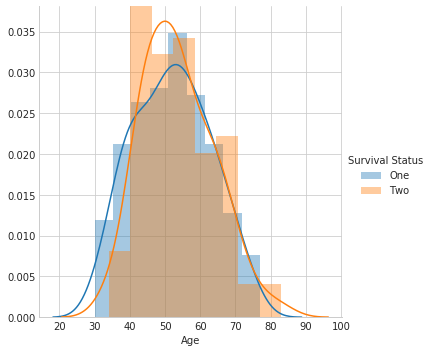

In [14]:
sns.FacetGrid(df, hue = 'Survival Status', size = 5)\
    .map(sns.distplot, 'Age')\
    .add_legend()
plt.show()

#### sns histogram with hue = 'Survival Status' represents how often a particular window of values occur. It does  not give the actual count. It comes with a pdf plot as well, which is the smoothened out histogram.

/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


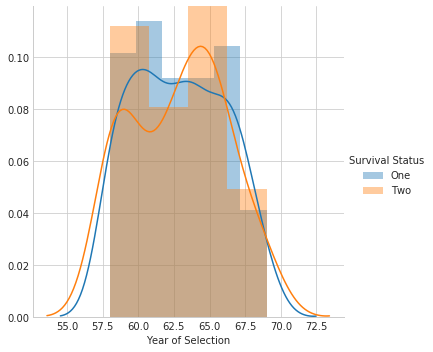

In [15]:
sns.FacetGrid(df, hue = 'Survival Status', size = 5)\
    .map(sns.distplot, 'Year of Selection')\
    .add_legend()
plt.show()

/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/krish-thorcode/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


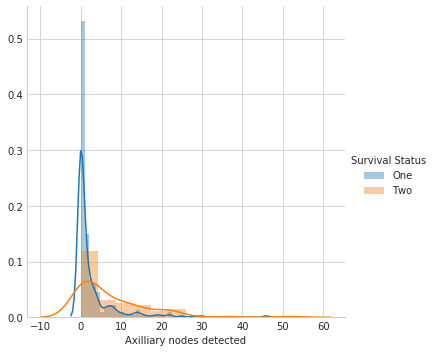

In [16]:
sns.FacetGrid(df, hue = 'Survival Status', size = 5)\
    .map(sns.distplot, 'Axilliary nodes detected')\
    .add_legend()
plt.show()

### Observation
There is a crazy overlap between the histograms corresponding to each class for all the three features!
"This is scary!".
The trivial observations that there are more datapoints with 'Axilliary nodes detected' values <=5 and these values are even lower after 15, could be made using scatter plots as well.



## CDF
To check for a given class, how the number of individuals vary with the values of an attribute

In [17]:
df.columns

Index(['Age', 'Year of Selection', 'Axilliary nodes detected',
       'Survival Status'],
      dtype='object')

#### For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Age

Deciding number of bins (checked the link given in a reply done by AAIC team on a comment, the video in that link said, we generally choose 5 to 20 bins- 5 more small datasets and 20 for big. Since in the lecture video, 10 bins were chosen for 150 datapoints, and 306 datapoints do not compare to big datasets, I stick to 10 bins). 

In [27]:
print('Max age: ' + str(df['Age'].max()), '\nMin age: ' + str(df['Age'].min()))
print('Size of data to be binnned: ' + str(df['Age'].shape))

Max age: 83 
Min age: 30
Size of data to be binnned: (306,)


Empty DataFrame
Columns: [Age, Year of Selection, Axilliary nodes detected, Survival Status]
Index: []
[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


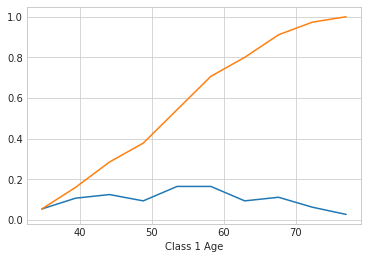

In [47]:
df_class_1 = df[df['Survival Status'] == 'One']
print(positive_class_df)

counts, bin_edges = np.histogram(df_class_1['Age'], bins= 10, density = True)
print(counts)
print(bin_edges)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Class 1 Age')
plt.show()

### Observation

From the PDF above, we can infer that most people who belonged to class 1 (survived for more than 5 yrs) belonged to the age group 50 to 60 yrs. From the CDF, about 80% of patients in class 1 are under the age of 65 (or slightly less than 65, greater than 60). On the other hand, all the patients of class 1 fall under the age of 80 (or under the age of 77-78).

#### For class-2 (patients who could survived for 5 yrs): PDF and CDF for Age

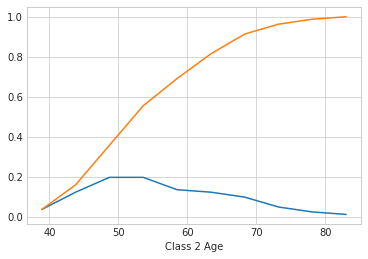

In [63]:
df_class_2 = df[df['Survival Status'] == 'Two']

# print(df_class_2)

counts, bin_edges = np.histogram(df_class_2['Age'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.xlabel('Class 2 Age')
plt.plot(bin_edges[1:], cdf)
plt.show()

### Observation:

From the above PDF plot, we see that most people who belonged to class 2 (did not survive for 5 yrs) were of the age group 45 to 58. If we compare this with the plot for class 1, we find that there is not much difference as most people who survived were of the age group 50 to 60 yrs.

The CDF also crosses 80% for age slightly less than 65 but more than 60 (similar to class 1 patients). 
However, there are patients of age more than 80 in class 2.

#### Plotting PDF and CDF of Age for both class 1 as well as class 2 in the same plot

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


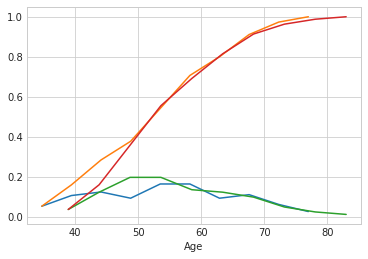

In [57]:
counts, bin_edges = np.histogram(df_class_1['Age'], bins= 10, density = True)
print(counts)
print(bin_edges)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')

counts, bin_edges = np.histogram(df_class_2['Age'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()


### From the plots for class-1 and class-2 wrt Age attribute
We can say that it is difficult to distinguish the two classes using any rule based on Age. This is what we found when we plotted histogram.

After we plot PDFs and CDFs for both the classes wrt age attribute, it becomes apparent that it is very difficult to discern the two classes using Age attribute (no if-then rules possible).

#### For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Year of Selection

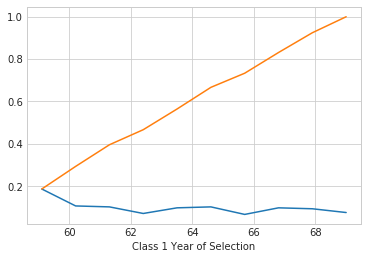

In [58]:
counts, bin_edges = np.histogram(df_class_1['Year of Selection'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Class 1 Year of Selection')
plt.show()

#### For class-2 (patients who could not survive for 5 yrs): PDF and CDF for Year of Selection

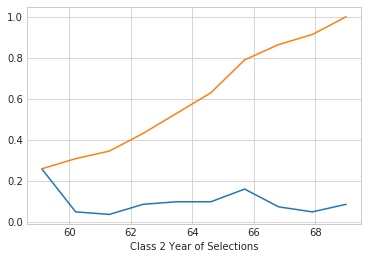

In [65]:
counts, bin_edges = np.histogram(df_class_2['Year of Selection'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Class 2 Year of Selections')
plt.show()

#### Plotting PDF and CDF for Year of Selections for both class-1 and class-2 in the same plot

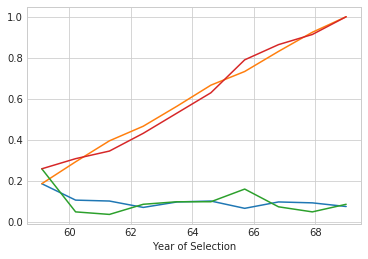

In [66]:
counts, bin_edges = np.histogram(df_class_1['Year of Selection'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Year of Selection')

counts, bin_edges = np.histogram(df_class_2['Year of Selection'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

### Observation:

From the above plots (individual plots for both classes wrt Year of Selection as well as from plotting both together in a single plot), we find that it is not possible to derive any kind of classification rules for the two classes using Year of Selection feature alone. We concluded the same thing when we plotted the histograms also.

#### For class-1 (patients who survived for more than 5 yrs): PDF and CDF for Axilliary nodes detected

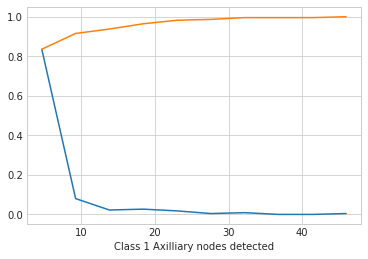

In [67]:
counts, bin_edges = np.histogram(df_class_1['Axilliary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Class 1 Axilliary nodes detected')
plt.show()

### Observation:
We observe that in class-1, the 10 is the most frequent value for Axilliary nodes detected (from PDF).

From the CDF, we can say that 80% of the patients were detected with less than 2 or 3 (atleast less than 5). This could be useful information if we see some different trend in values of Auxilliary nodes detected for class 2.

#### For class-2 (patients who could not survive for 5 yrs): PDF and CDF for Axilliary nodes detected

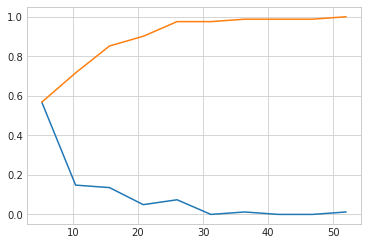

In [70]:
counts, bin_edges = np.histogram(df_class_2['Axilliary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Class 2 Axilliary nodes detected')

plt.show()

### Observation:
From the PDF, most of the patients had Axilliary nodes detected value less than 10, which is disheartening because we got similar observations for class-1 also.
From the CDF, 80% of the patients were detected with less than (atleast) 15 axilliary nodes. Although class-1 had 80% of its patients with less than 5 axilliary nodes, we still need to check as the difference is not too much.

#### Plotting the PDFs and CDFs of Axilliary nodes detected for both the classes-1 and 2

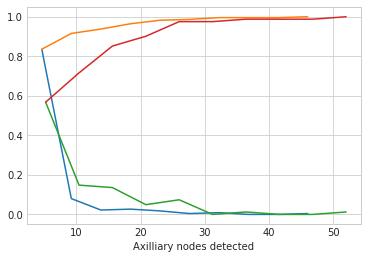

In [71]:
counts, bin_edges = np.histogram(df_class_1['Axilliary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_class_2['Axilliary nodes detected'], bins = 10, density = True)

pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axilliary nodes detected')

plt.show()

### Observation:

Although 80% class-1 patients had number of axiliary nodes detected < 5, 60% of class-2 patients also had the same number of detections. PDF is all overlapping. Any rule based on this would be highly full of errors. Hence, no classification rules can be made.